###**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and **also help the sellers understand what factors are fetching more money for the houses?**


####**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**Load dataset**

In [ ]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


###**Basic Analysis**

**To get the shape of dataset**

In [ ]:
df.shape

(7109, 22)

**Dataset contain 7109 rows and 22 column**

**To get the information about the dataset like date types and not null count.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**To get the null count**

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Null values are present in column N_BEDROOM, N_BATHROOM and QS_OVERALL**

**Replace the null values**

In [ ]:
df.N_BEDROOM.value_counts()
df['N_BEDROOM'].fillna('0', inplace=True)
df.N_BATHROOM.value_counts()
df['N_BATHROOM'].fillna('0', inplace=True)
df.QS_OVERALL= df.QS_OVERALL.fillna(df.QS_OVERALL.median())

#####As the N_BEDROOM N_BATHROOM are categorical we use mode to impute the null values. QS_OVERALL is having continuous value so we are imputing null values with mean or median I used median here.

In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

###**Check for the data types**

In [ ]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

**Convert data type of column N_BATHROOM from float to int**

In [ ]:
df["N_BEDROOM"] = df["N_BEDROOM"].astype('int')

In [ ]:
df["N_BATHROOM"]=df["N_BATHROOM"].astype('int')

In [ ]:
df["QS_ROOMS"]=df["QS_ROOMS"].astype('int')

In [ ]:
df["QS_BATHROOM"]=df["QS_BATHROOM"].astype('int')

In [ ]:
df["QS_BEDROOM"]=df["QS_BEDROOM"].astype('int')

In [ ]:
df["QS_OVERALL"]=df["QS_OVERALL"].astype('int')

**Change the type of column to proper datatype**

In [ ]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format='%d-%m-%Y')

In [ ]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format='%d-%m-%Y')

**Creating new column AGE based on DATE_SALE and DATE_BUILD**

In [ ]:
df["AGE"]=pd.DatetimeIndex(df["DATE_SALE"]).year - pd.DatetimeIndex(df["DATE_BUILD"]).year

In [ ]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                  int64
QS_BATHROOM               int64
QS_BEDROOM                int64
QS_OVERALL                int64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
AGE                       int64
dtype: object

###**Discriptive Analysis**

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636798,1.212407,3.688704,3.075538,3.069349,3.056126,3.004501,376938.330708,141005.726544,1.089491e+07,24.276270
std,457.410902,57.403110,0.803080,0.410756,1.019099,0.872937,0.876024,0.871499,0.603154,143070.662010,78768.093718,3.768603e+06,12.334164
min,500.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,272406.000000,84219.000000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,349486.000000,127628.000000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,451562.000000,184506.000000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.000000,983922.000000,495405.000000,2.366734e+07,55.000000


###**Drop column**

#####**Drop column "PRT_ID","COMMIS" and "REG_FEE".**

In [ ]:
df=df.drop(["PRT_ID","DATE_SALE","DATE_BUILD","REG_FEE","COMMIS"], axis=1)

In [ ]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20


In [ ]:
df.shape

(7109, 18)

###**Convert data in structured format**

**Removing Spelling mistake in STREET column**

In [ ]:
df["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
mappings = {'NoAccess': 'No Access',
            'Pavd':'Paved',
            }

# Replace values and collapse data
df['STREET'] = df['STREET'].replace(mappings)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**Removing Spelling mistake in UTILITY_AVAIL column**

In [ ]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
mappings = {'All Pub': 'AllPub',
            'NoSewr ':'NoSeWa'
            }

# Replace values and collapse data
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(mappings)
df['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

**Removing Spelling mistake in BUILDTYPE column**

In [ ]:
df["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
mappings = {'Comercial': 'Commercial',
            'Other':'Others'
            }

# Replace values and collapse data
df['BUILDTYPE'] = df['BUILDTYPE'].replace(mappings)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**Removing Spelling mistake in PARK_FACIL column**

In [ ]:
df["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
mappings = {'Noo': 'No'
            }
df['PARK_FACIL'] = df['PARK_FACIL'].replace(mappings)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**Removing Spelling mistake in SALE_COND column**

In [ ]:
df["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
mappings = {'Adj Land': 'AdjLand', 
            'Partiall': 'Partial',
            'PartiaLl': 'Partial',
            'Ab Normal':'AbNormal'
            }

# Replace values and collapse data
df['SALE_COND'] = df['SALE_COND'].replace(mappings)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**Remove spelling Mistakes in the column.**

In [ ]:
df["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
mappings = { 'Chrompt' : 'Chrompet',
            'Chrmpet':'Chrompet',
            'Chormpet':'Chrompet',
             'Karapakam':'Karapakkam',
             'KKNagar':'KK Nagar',
             'Velchery':'Velachery',
             'Ann Nagar':'Anna Nagar',
             'Ana Nagar':'Anna Nagar',
             'Adyr':'Adyar',
             'TNagar':'T Nagar',
}

# Replace values and collapse data
df['AREA'] = df['AREA'].replace(mappings)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [ ]:
df["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

###**EDA**

In [ ]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

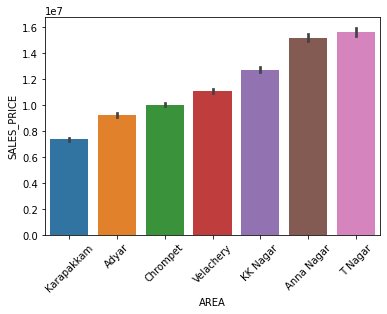

In [ ]:
sns.barplot(df["AREA"],df["SALES_PRICE"],data=df,order=area_order)
plt.xticks(rotation=45)

####**Conclusion**

#####**1.   Highest sales price in T Nager and in Anna nager**
#####**2.   Lowest sales price in karapakkam**
#####**3.   In area we can clearly see there is the linear relationship between  feature and target.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


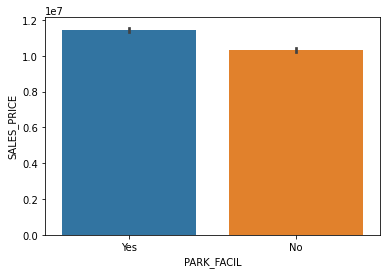

In [ ]:
sns.barplot(df["PARK_FACIL"],df["SALES_PRICE"])

####**Conclusion**

#####**1.   If Park facility is there then sales price is high.**

#####**2.   If No Park facility then sales price is low.**
#####**3.   In parking facility we can clearly see there is the linear relationship between          feature and target.**



In [ ]:
sale_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


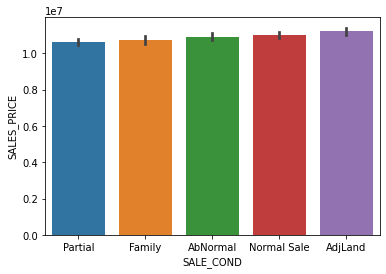

In [ ]:
sns.barplot(df["SALE_COND"],df["SALES_PRICE"],order=sale_order)

####**Conclusion**


#####**1.   As the features changes target is not changing so we will drop this feature during model building.**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


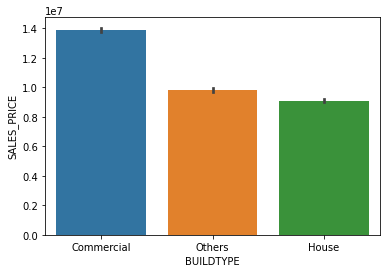

In [ ]:
sns.barplot(df["BUILDTYPE"],df["SALES_PRICE"])

####**Conclusion**


#####**1.   For commercial sales price is higher as compaired to other and house.**




In [ ]:
utility_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


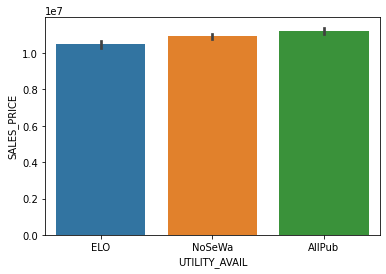

In [ ]:
sns.barplot(df["UTILITY_AVAIL"],df["SALES_PRICE"],order=utility_order)

####**Conclusion**


#####**1.   Here we can see the linear relationship between feature and target.**



In [ ]:
sale_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


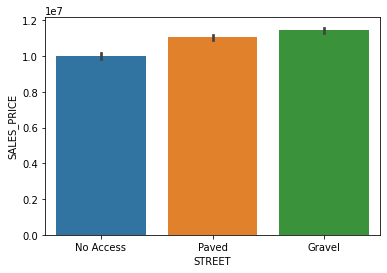

In [ ]:
sns.barplot(df["STREET"],df["SALES_PRICE"],order=sale_order)

####**Conclusion**


#####**1.   For Gravel sales price is higher.**
#####**1.   Here we can see the relationship between feature and target.**



In [ ]:
zone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


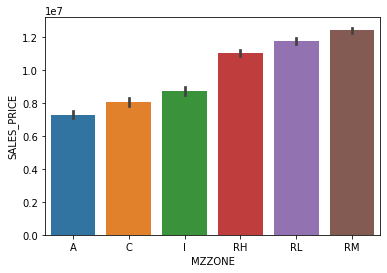

In [ ]:
sns.barplot(df["MZZONE"],df["SALES_PRICE"],order=zone_order)

####**Conclusion**

#####**1.   For RM zone sales price is highest.**
#####**2.   For A zone sales price is lowest.**
#####**2.   Here we can see the piecewise linear relationship between feature and target.**




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


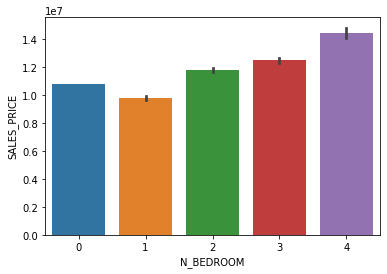

In [ ]:
sns.barplot(df["N_BEDROOM"],df["SALES_PRICE"])

####**Conclusion**

#####**1.   More number of Bedroom more sales price.**
#####**2.   Here we can see linear relationship between feature and target.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


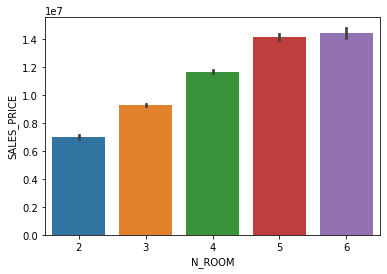

In [ ]:
sns.barplot(df["N_ROOM"],df["SALES_PRICE"])

####**Conclusion**

#####**1.   More number of Rooms more sales price.**
#####**1.   Here we can see the relationship between feature and target.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


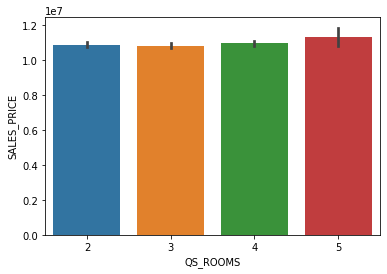

In [ ]:
sns.barplot(df["QS_ROOMS"],df["SALES_PRICE"])

**There no relationship between feature and target.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


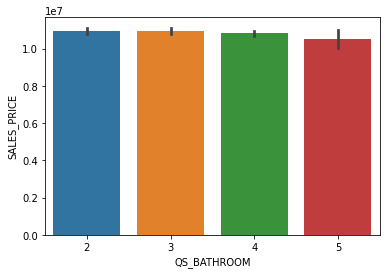

In [ ]:
sns.barplot(df["QS_BATHROOM"],df["SALES_PRICE"])

**There no relationship between feature and target.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


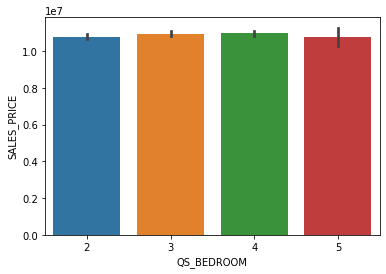

In [ ]:
sns.barplot(df["QS_BEDROOM"],df["SALES_PRICE"])

**There no relationship between feature and target.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


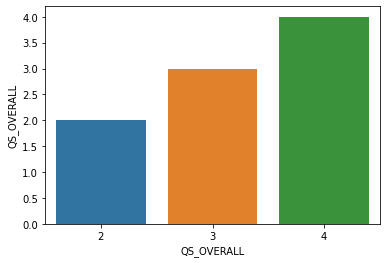

In [ ]:
sns.barplot(df["QS_OVERALL"],df["QS_OVERALL"])

###**Distribution plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


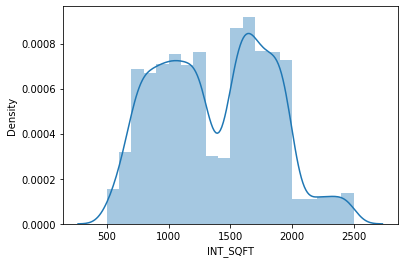

In [ ]:
sns.distplot(df['INT_SQFT'], bins = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


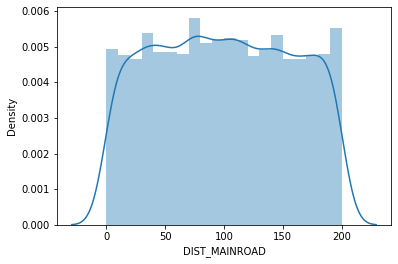

In [ ]:
sns.distplot(df['DIST_MAINROAD'], bins = 20)
plt.show()

**It shows the uniform distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


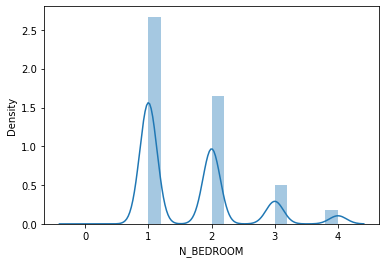

In [ ]:
sns.distplot(df['N_BEDROOM'], bins = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


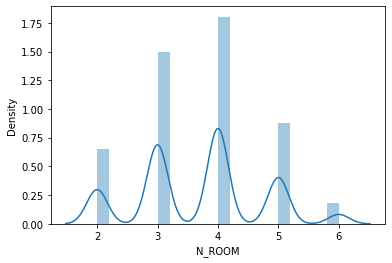

In [ ]:
sns.distplot(df['N_ROOM'], bins = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


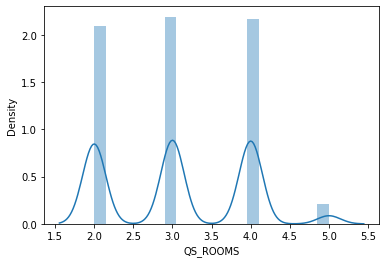

In [ ]:
sns.distplot(df['QS_ROOMS'], bins = 20)
plt.show()

**It shows the uniform distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


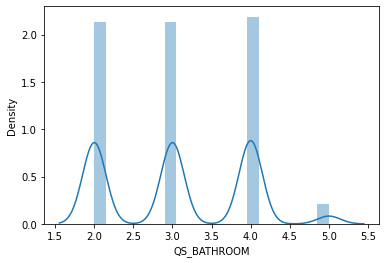

In [ ]:
sns.distplot(df['QS_BATHROOM'], bins = 20)
plt.show()

**It shows the uniform distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


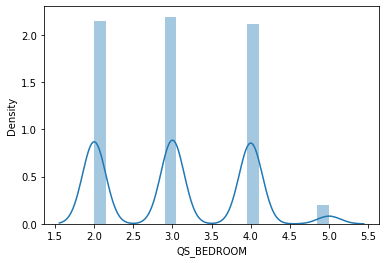

In [ ]:
sns.distplot(df['QS_BEDROOM'], bins = 20)
plt.show()

**It shows the uniform distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


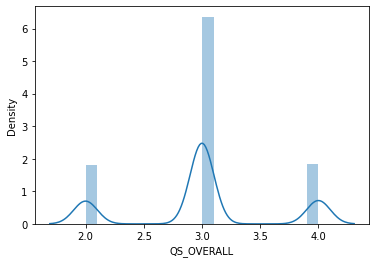

In [ ]:
sns.distplot(df['QS_OVERALL'], bins = 20)
plt.show()

**It shows the normal distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


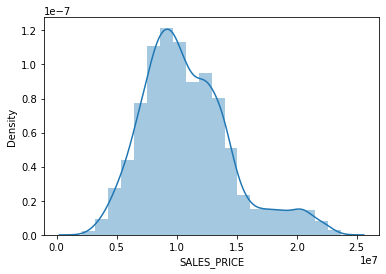

In [ ]:
sns.distplot(df['SALES_PRICE'], bins = 20)
plt.show()

###**Regression plot for continuous feature.**

#####**Checking Relationship between DIST_MAINROAD and SALES_PRICE**

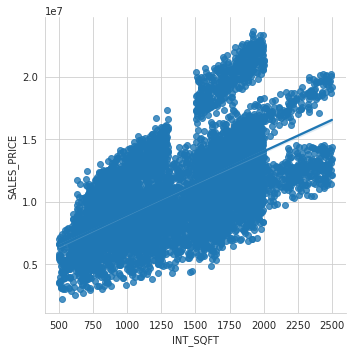

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='INT_SQFT', y ='SALES_PRICE', data = df)

**Here we can see strong relationship between feature and target.**

#####**Relationship between DIST_MAINROAD and SALES_PRICE**

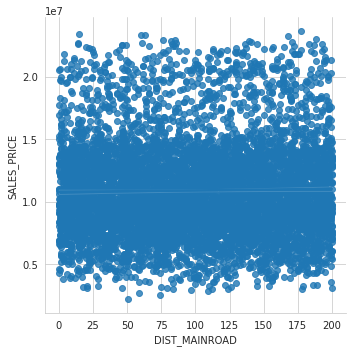

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='DIST_MAINROAD', y ='SALES_PRICE', data = df)

**Here we can not see any relationship between feature and target.**

####**Checking Relationship between N_BATHROOM and SALES_PRICE**

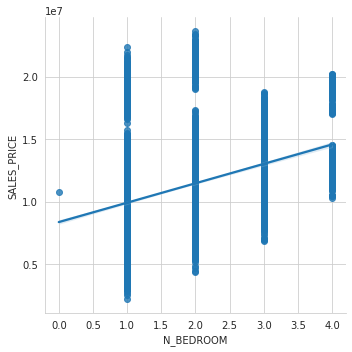

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='N_BEDROOM', y ='SALES_PRICE', data = df)

**Here we can see relationship between feature and target.**

####**Checking Relationship between N_BATHROOM and SALES_PRICE**

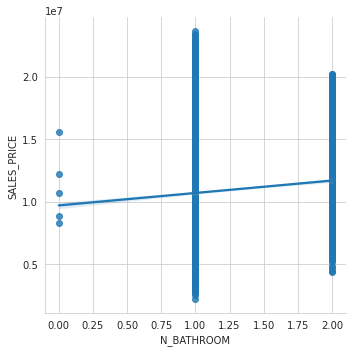

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='N_BATHROOM', y ='SALES_PRICE', data = df)

**Here we can see relationship between feature and target.**

####**Checking Relationship between N_ROOM and SALES_PRICE**

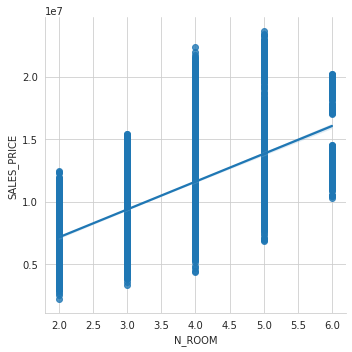

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='N_ROOM', y ='SALES_PRICE', data = df)

**Here we can see relationship between feature and target.**

####**Checking Relationship between QS_ROOMs and SALES_PRICE**

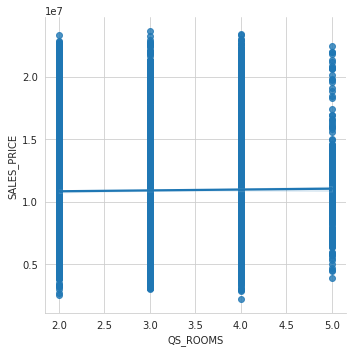

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='QS_ROOMS', y ='SALES_PRICE', data = df)

**Here we can not see any relationship between feature and target so we can drop this column.**

####**Checking Relationship between QS_BATHROOM and SALES_PRICE**

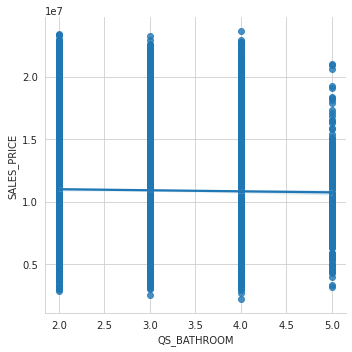

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='QS_BATHROOM', y ='SALES_PRICE', data = df)

**Here we can not see any relationship between feature and target so we can drop this column.**

####**Checking Relationship between QS_BEDROOM and SALES_PRICE**

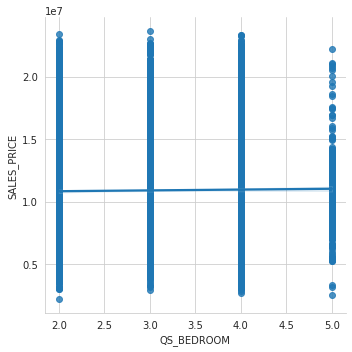

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='QS_BEDROOM', y ='SALES_PRICE', data = df)

**Here we can not see any relationship between feature and target so we can drop this column.**

####**Checking Relationship between QS_OVERALL and SALES_PRICE**

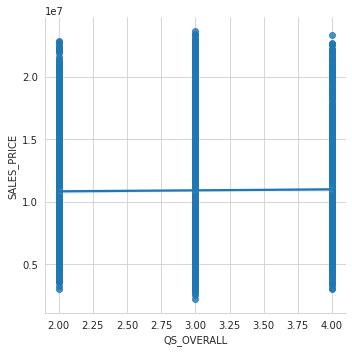

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='QS_OVERALL', y ='SALES_PRICE', data = df)

**Here we can not see any relationship between feature and target so we can drop this column.**

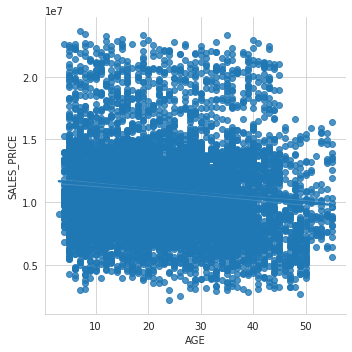

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='AGE', y ='SALES_PRICE', data = df)

**Drop the column those are having no linear relationship with target**

In [ ]:
df=df.drop(['DIST_MAINROAD','SALE_COND','N_BATHROOM','QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM','QS_OVERALL'], axis=1)

In [ ]:
df.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,3,Yes,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2,5,No,Commercial,AllPub,Gravel,RH,21717770,11


###**Encoding**

In [ ]:
df.AREA = df.AREA.map({'Karapakkam':0, 'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

In [ ]:
#df.SALE_COND=df.SALE_COND.map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5})

In [ ]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.map({'ELO':0,'NoSeWa':1,'AllPub':2})

In [ ]:
df.PARK_FACIL = df.PARK_FACIL.map({"Yes" : 1, "No" : 0})

In [ ]:
df.STREET = df.STREET.map({"No Access":0,"Paved" : 1,"Gravel" : 2})

In [ ]:
df.MZZONE=df.MZZONE.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

From EDA as we got linear relationship for all above feature so, we are using lable encoding and for BUILDTYPE we never find the linear relation but there is the relationship so we use one hot encoding for this. 

In [ ]:
data = pd.get_dummies(df, columns = ['BUILDTYPE']) 
data.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,5,0,2,2,4,21717770,11,1,0,0


###**Split the data**

In [ ]:
X = data.drop('SALES_PRICE',axis=1).values #array of features
y = data['SALES_PRICE'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###**Scale the model**

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

#####Scalling is not mandetory for all ML algorithm in scalling we are normalizing or standardizating the training data.

###**Model training**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE','AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,0
AREA,9.840510e+05
INT_SQFT,6.951451e+05
N_BEDROOM,-1.208231e+06
N_ROOM,1.784580e+06
PARK_FACIL,5.254017e+05
UTILITY_AVAIL,4.347157e+04
STREET,4.020337e+05
MZZONE,8.722710e+05
AGE,-2.133006e+05
BUILDTYPE_Commercial,1.352464e+06


In [ ]:
regressor.intercept_ # c 

10925361.342535606

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,13376150,1.400511e+07
1,12857440,1.310250e+07
2,19124310,1.860374e+07
3,4905000,4.009832e+06
4,13534450,1.337323e+07
...,...,...
1417,9987005,9.832379e+06
1418,5821000,6.311422e+06
1419,13364730,1.377967e+07
1420,17115030,1.582303e+07


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9215351901140906


**Accuracy using linear regression is 92%**

###**XG BOOST**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3757160751350299  Cross-Val score :  -0.3826207990744903
Learning rate :  0.02  Train score :  0.7468745062209117  Cross-Val score :  0.7438281855427318
Learning rate :  0.03  Train score :  0.925212465932328  Cross-Val score :  0.9226690027253653
Learning rate :  0.04  Train score :  0.9624971443007466  Cross-Val score :  0.9603507861239757
Learning rate :  0.05  Train score :  0.9746807901585431  Cross-Val score :  0.9725220090765039
Learning rate :  0.06  Train score :  0.9801163488972403  Cross-Val score :  0.9787555040300463
Learning rate :  0.07  Train score :  0.984236013640058  Cross-Val score :  0.9828757676024136
Learning rate :  0.08  Train score :  0.9874282377919262  Cross-Val score :  0.9857398557684082
Learning rate :  0.09  Train score :  0.9894688779164413  Cross-Val score :  0.9878381291878482
Learning rate :  0.1  Train score :  0.9907625759805927  Cross-Val score :  0.9894368546450988
Learning rate :  0.11  Train score :  0.9

In [ ]:
model = xgb.XGBRegressor(learning_rate = 1, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test) # scoring the model - r2 squared

[08:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9914607314558611

**Accuracy of model is 99%**

##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(X_train, y_train)
dt.predict(X_test)

array([14096461.36574074, 11945752.98245614, 17900060.51724138, ...,
       12832700.61983471, 19011484.57142857,  9280901.61862528])

In [ ]:
from sklearn.metrics import  r2_score
y_pred = dt.predict(X_test)
rsquared = r2_score(y_test,y_pred)
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set R2 of dt: 0.94


**Accuracy using Decision Tree is 94%**

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 6, max_features='sqrt')
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)
r2_score(predictions, y_test)

0.9279884922928366

**Accuracy using Random Forest is 92%**

####**Got Best Accuracy for XGBoost Model that 99%**

###**Suggestions to sellers and Buyers**


####**Sellers :-** 
If Any sellers want to buy a building in chennai I would like to suggest them to build a commercial building. Also, As the sells price of "T Nager" is Highest as compaired to other area then it must be the first choise and second must be the "Anna Nager". Also I want to suggest Build with the "Parking facility" and "All_utility".
Gravel type street fetches more money than Paved Street. I will strongly suggest not to construct any type of building which has no access to the building.

####**Buyers :-**
The sales_price of "House" building is lesser than "Others" and "Commercial" type buildings.
Location wise I would suggest to the buyers to buy in Karapakkam followed by Chrompet and Adyar beacuse, the price is much lower than other.

###**Generalized Conclusion**



1.   Number of rooms and number of bedroom are most affecting factor for the price of the house as the number of rooms and bedroom increses price also increses.
2.   Area is also the important factor which is affecting on the price of the house and int square feet.
3.   If there is parking facility then house price will be more if no parking facility the price is low.
4.   Utility, Street, zone and age of the house is also contributing the major role for house price.
5.    Building type also gives the variation in the price.